<a href="https://colab.research.google.com/github/taherezzaier/Projet/blob/main/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/Breast_cancer_data.csv')

data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
print ("les dimension de dataset sont (nombre de ligne nombre de colonne)=",data.shape)

les dimension de dataset sont (nombre de ligne nombre de colonne)= (569, 6)


In [ ]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
!pip install seaborn # Install seaborn library
import seaborn as sns # Import the library and assign it the alias 'sns'

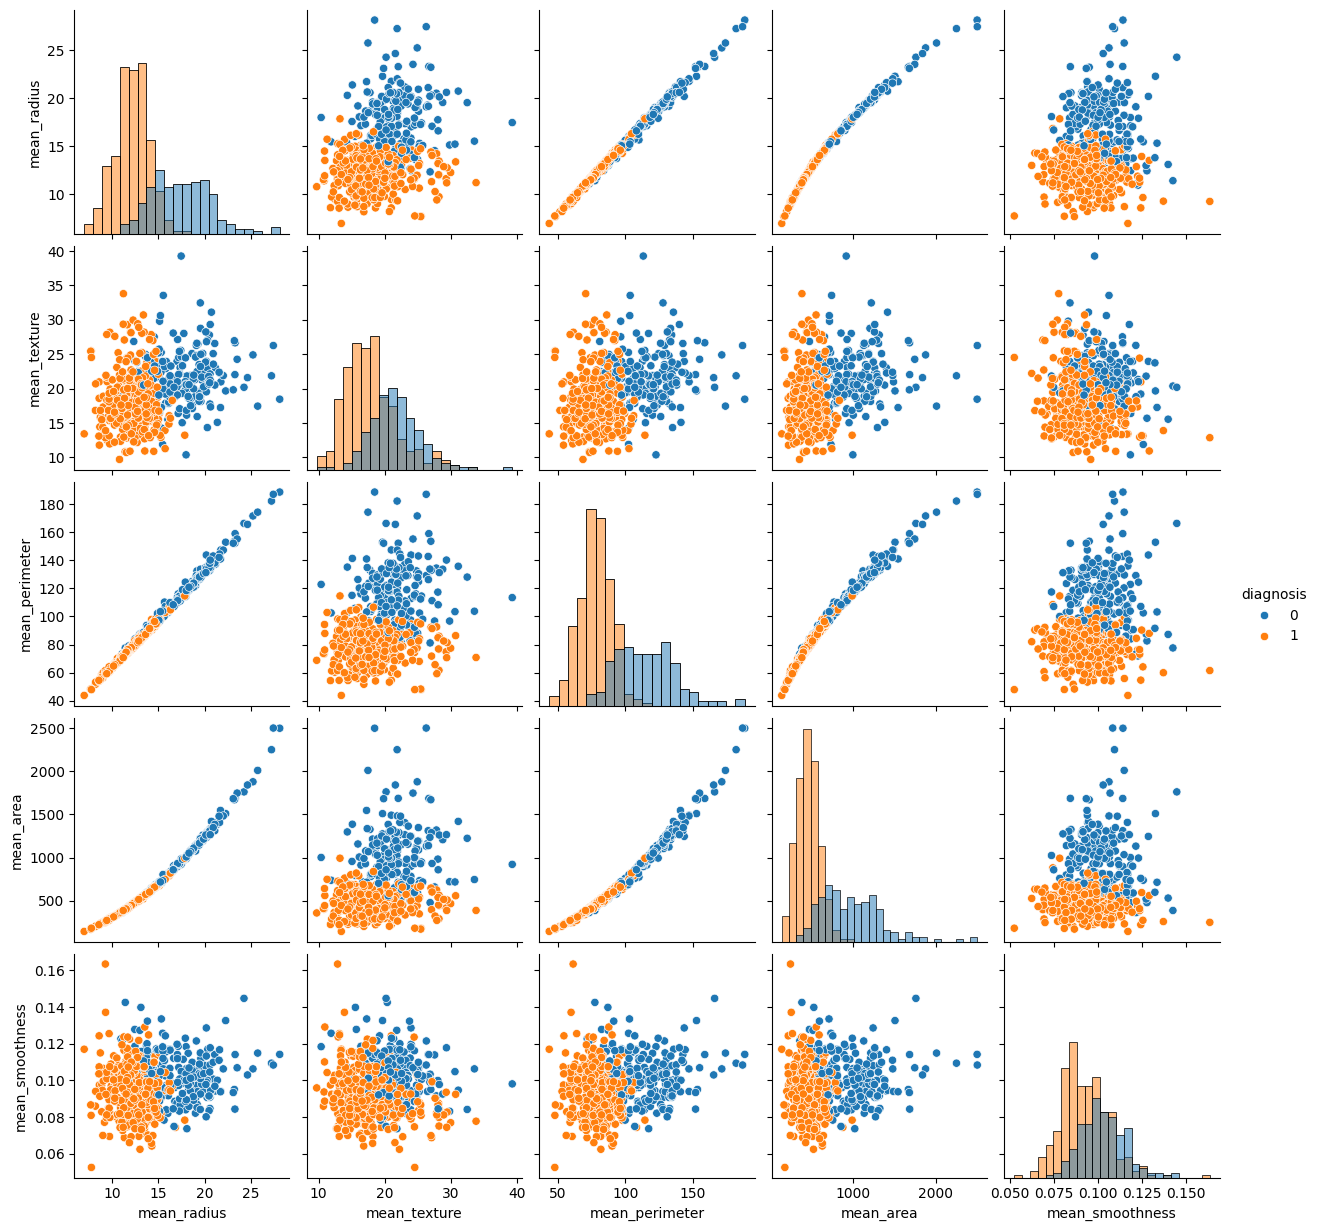

In [ ]:
sns.pairplot(data, hue="diagnosis",diag_kind="hist" )

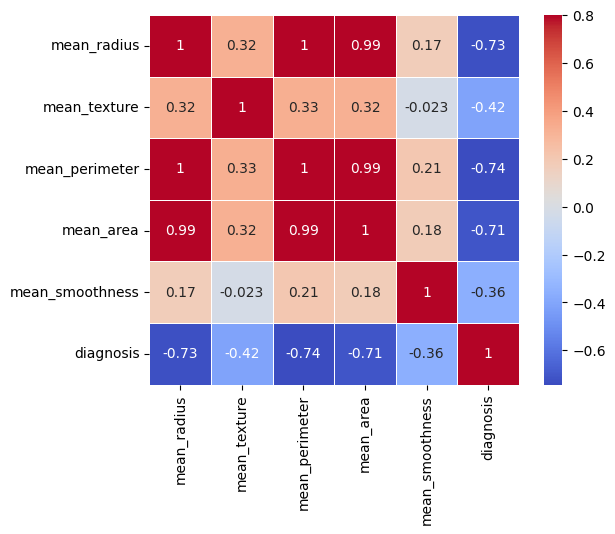

In [ ]:
matrix = data.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap="coolwarm",annot=True,linewidths=.5);

In [ ]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

## `Split ***X*** and ***Y***`

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# *Linear* *Regression*

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print("ACCURACY:",acc)

ACCURACY: 0.6536446483035243


# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
print(f"ACCURACY: {accuracy}")

# Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train , y_train)
acc1 = etc.score(x_test , y_test)

print("ACCURACY:", acc1)

ACCURACY: 0.9649122807017544


# `ANN`

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [ ]:
dmodel = Sequential()

dmodel.add(Dense(25 , activation = "relu", input_dim = 5))
dmodel.add(Dense(20 , activation = "relu"))
dmodel.add(Dense(15 , activation = "relu"))
dmodel.add(Dense(7 , activation = "relu"))
dmodel.add(Dropout(0.2))
dmodel.add(Dense(1 , activation = "sigmoid"))

In [ ]:
dmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 7)                 112       
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1105 (4.32 KB)
Trainable params: 1105 (4.3

In [ ]:
Model: "sequential"

In [ ]:
dmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history = dmodel.fit(x_train,y_train , epochs = 50, validation_data=(x_test, y_test))

Epoch 1/50
15/15 [==============================] - 2s 21ms/step - loss: 22.5212 - accuracy: 0.4835 - val_loss: 3.4372 - val_accuracy: 0.3772
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 9.1080 - accuracy: 0.4725 - val_loss: 2.1551 - val_accuracy: 0.3772
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 5.3716 - accuracy: 0.5143 - val_loss: 0.8133 - val_accuracy: 0.3772
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 4.3651 - accuracy: 0.5670 - val_loss: 0.3998 - val_accuracy: 0.9211
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 2.8931 - accuracy: 0.6264 - val_loss: 0.8188 - val_accuracy: 0.6667
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 1.7097 - accuracy: 0.6066 - val_loss: 0.4138 - val_accuracy: 0.8333
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 1.5122 - accuracy: 0.6198 - val_loss: 0.4164 - val_accuracy: 0.8070
Epoch 8/50
15/15 [

**Prediction** **ANN**

In [ ]:
#enter inputs here
import numpy as np # Import the NumPy library

mean_radius = 17.99
mean_texture = 10.38
mean_perimeter = 122.80
mean_area = 1001.0
mean_smoothness = 0.11840


inp = np.array([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]]) # Use np to create array

predict = dmodel.predict(inp)

if predict < 1 :
    print("diagnosis : benign")

else:
    print("diagnosis : malignant")


print ("percentage: ", predict)

1/1 [==============================] - 0s 211ms/step
diagnosis : benign
percentage:  [[0.5064012]]


**Prediction ETC**

In [ ]:
#enter inputs here

mean_radius = 17.99
mean_texture = 10.38
mean_perimeter = 122.80
mean_area = 1001.0
mean_smoothness = 0.11840


inp = np.array([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]])

prediction = etc.predict(inp)

if prediction < 1 :
    print("diagnosis : benign")

else:
    print("diagnosis : malignant")


print ("percentage: ", prediction)

**Prediction KNN**

In [ ]:
#enter inputs here

mean_radius = 17.99
mean_texture = 10.38
mean_perimeter = 122.80
mean_area = 1001.0
mean_smoothness = 0.11840

inp = [[mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness]]

predictions = knn.predict(inp)

if predictions == 0:
    print("diagnosis : benign")

else:
    print("diagnosis : malignant")


print (predictions)

diagnosis : benign
[0]
